# Images with fastai
---
All kinds of learning tasks with image inputs using fastai library
___

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

# 1. Image Multi-classifcation

## Load Data: Amazon Planet

In [3]:
plnt_path = Config.data_path()/'planet'
plnt_path.mkdir(parents=True, exist_ok=True)
plnt_path

PosixPath('/home/jupyter/.fastai/data/planet')

In [11]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  
! unzip -q -n {path}/train_v2.csv.zip -d {path}

 99%|███████████████████████████████████████▌| 593M/600M [00:15<00:00, 36.6MB/s]
100%|████████████████████████████████████████| 600M/600M [00:15<00:00, 41.4MB/s]
  0%|                                                | 0.00/159k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 159k/159k [00:00<00:00, 75.5MB/s]


In [13]:
! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path}

In [4]:
plnt_path.ls()

[PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/__MACOSX'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg.tar.7z'),
 PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv.zip')]

## EDA

In [11]:
df = pd.read_csv(plnt_path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [12]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_warp=0.0)

In [13]:
plnt_data = (ImageItemList.from_df(df, path=plnt_path/'train-jpg', suffix='.jpg')
             .random_split_by_pct()
             .label_from_df(label_delim=' ')
             .transform(tfms, size=128)
             .databunch().normalize(imagenet_stats))

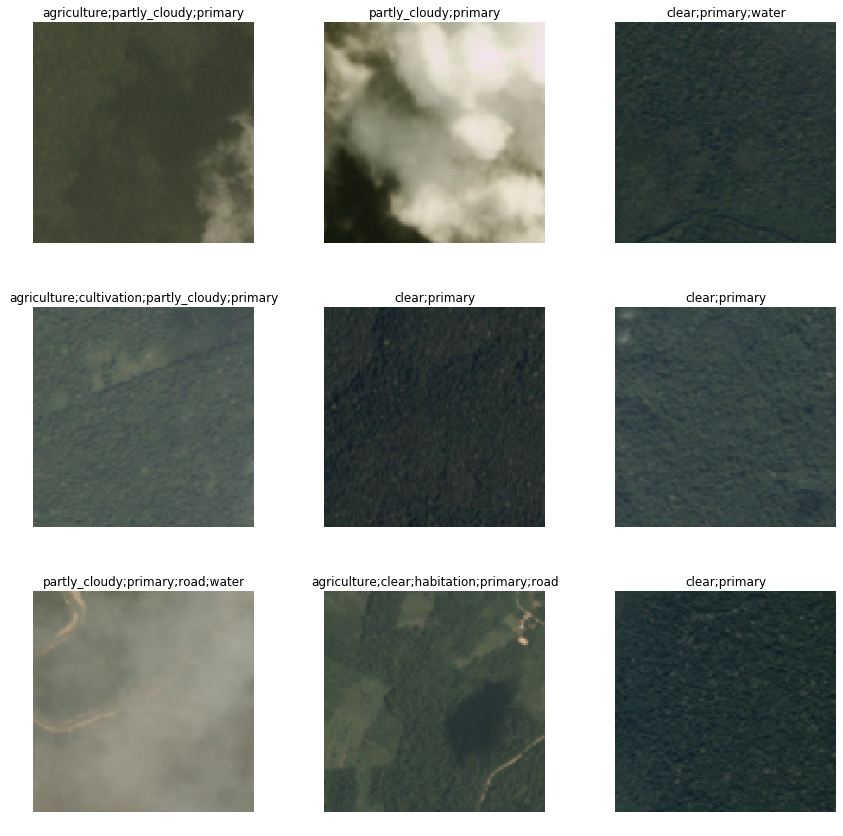

In [14]:
plnt_data.show_batch(rows=3)

In [15]:
plnt_data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

## Training

In [23]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
plnt_metrics = [acc_02, fbeta]

In [24]:
model = models.resnet34
learner = create_cnn(data=plnt_data, arch=model, metrics=plnt_metrics)

**1. Train only head**

In [25]:
lr_find(learner)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


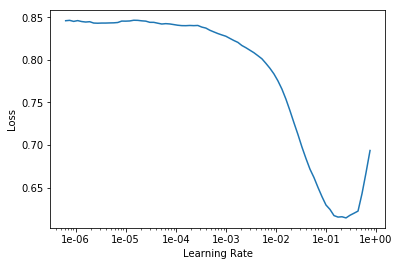

In [26]:
learner.recorder.plot()

In [29]:
lr = 1e-1

In [31]:
learner.fit_one_cycle(cyc_len=5, max_lr=lr)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.178572,0.193844,0.888668,0.829656
2,0.222065,0.284810,0.890470,0.831777
3,0.155469,0.221407,0.937376,0.869358
4,0.127377,0.129345,0.941729,0.900736
5,0.114433,0.227691,0.947637,0.909918


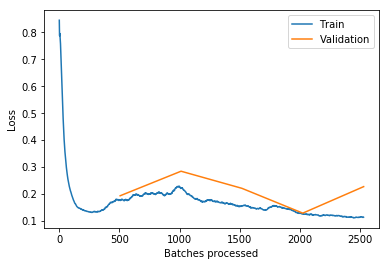

In [32]:
learner.recorder.plot_losses()

**2. Finetune Model**

In [33]:
learner.unfreeze()

In [34]:
lr_find(learner)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


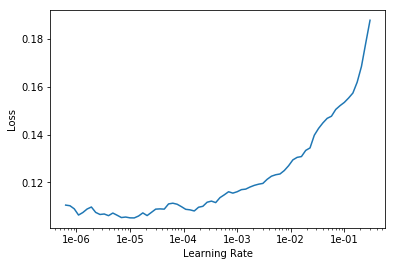

In [35]:
learner.recorder.plot()

In [38]:
learner.fit_one_cycle(4, slice(2e-6, lr/10))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.119302,0.115793,0.944919,0.908683
2,0.110419,0.102134,0.951415,0.910918
3,0.105002,0.098959,0.951793,0.914987
4,0.103052,0.109209,0.950579,0.915717


Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fe380f4a8c8>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fe380f4a8c8>
Traceback (most recent call last):
Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fe380f4a8c8>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in 

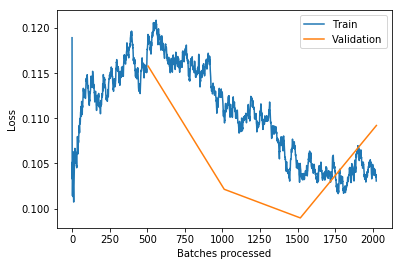

In [39]:
learner.recorder.plot_losses()

In [40]:
learner.save('rn34_trained')

## Results

In [42]:
learner.load('rn34_trained');

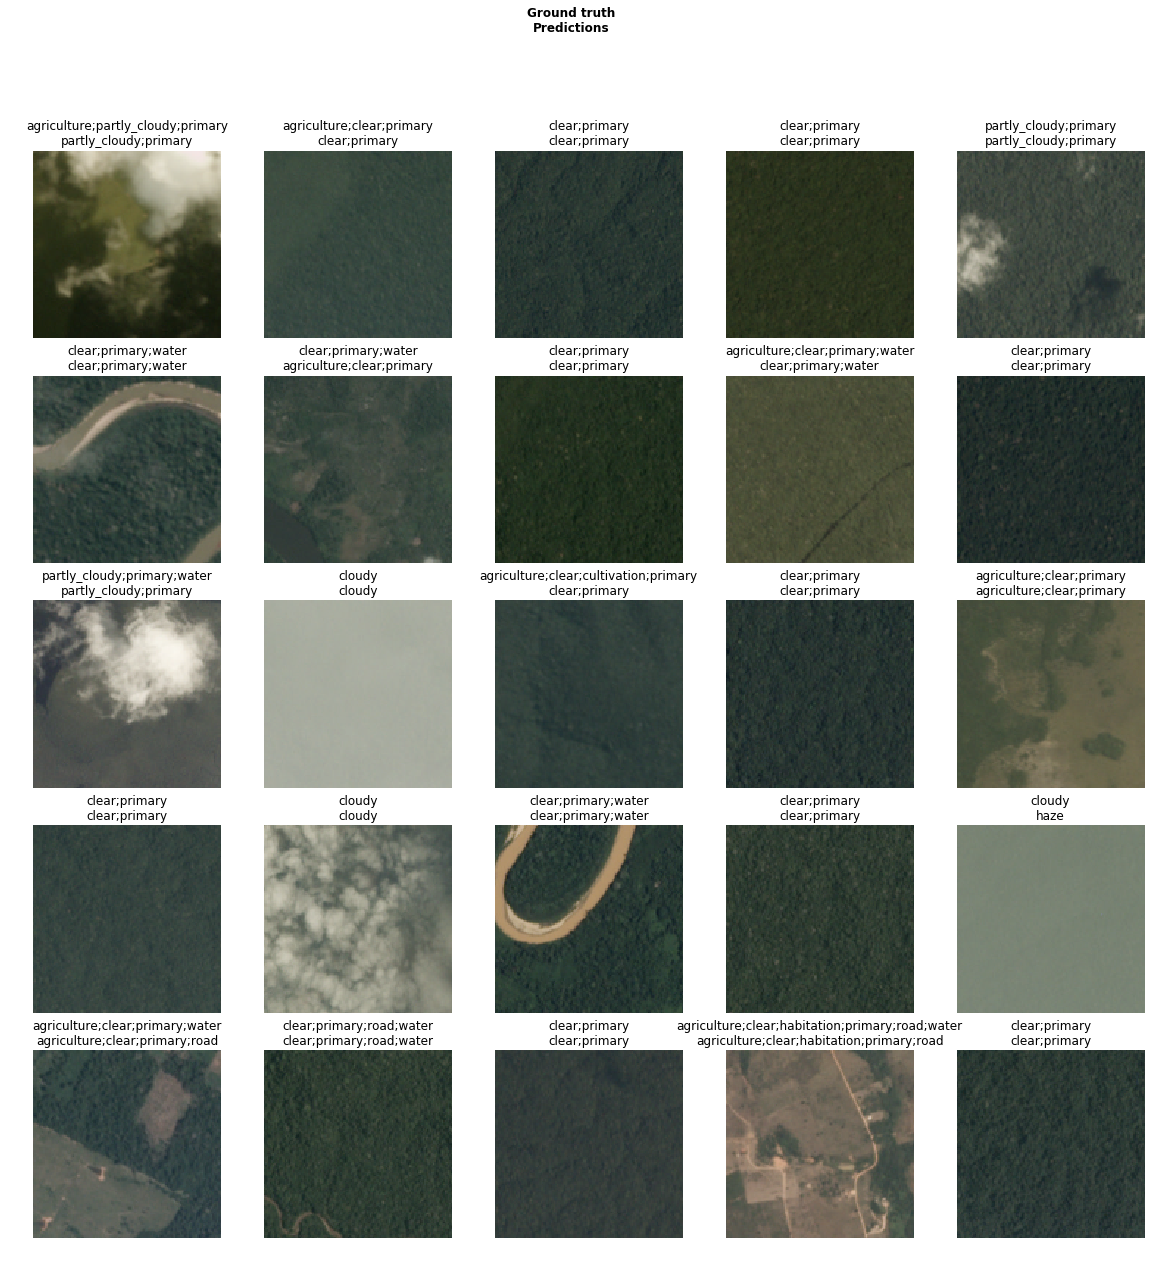

In [43]:
learner.show_results()

# 2. Image Regression

## Load Data: BIWI Head Pose Estimation

In [44]:
biwi_path = untar_data(URLs.BIWI_HEAD_POSE)
biwi_path.ls()

[PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/24.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/03'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/17.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/13.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/16.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/09'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/23.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/10.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/17'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/14'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/13'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/18.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/01.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/21.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/03.obj'),
 PosixPath('/home/jupyter/.fastai/data/biwi_head_pose/14.obj

In [18]:
! ls {biwi_path}/05 | head

depth.cal
frame_00003_pose.txt
frame_00003_rgb.jpg
frame_00004_pose.txt
frame_00004_rgb.jpg
frame_00005_pose.txt
frame_00005_rgb.jpg
frame_00006_pose.txt
frame_00006_rgb.jpg
frame_00007_pose.txt
ls: write error: Broken pipe


In [45]:
! cat {biwi_path}/readme.txt

Biwi Kinect Head Pose Database

This database is made available for non-commercial use such as university research and education.

We kindly ask you to cite the following reference in your publications related to this work:

@article{fanelli_IJCV,
  author = {Fanelli, Gabriele and Dantone, Matthias and Gall, Juergen and Fossati, Andrea and Van Gool, Luc},
  title = {Random Forests for Real Time 3D Face Analysis},
  journal = {Int. J. Comput. Vision},
  year = {2013},
  month = {February},
  volume = {101},
  number = {3},
  pages = {437--458}
}

The database contains 24 sequences acquired with a Kinect sensor. 20 people (some were recorded twice - 6 women and 14 men) were recorded while turning their heads, sitting in front of the sensor, at roughly one meter of distance.

For each sequence, the corresponding .obj file represents a head template deformed to match the neutral face of that specific person.
In each folder, two .cal files contain calibration information for the depth and t

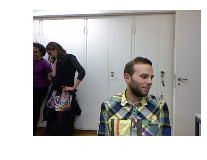

In [46]:
fname = '09/frame_00667_rgb.jpg'
img = open_image(biwi_path/fname)
img.show()

In [47]:
! cat {biwi_path}/05/frame_00003_pose.txt

0.998532 0.00938925 0.0533382 
-0.0129671 0.99766 0.0671331 
-0.052583 -0.0677262 0.996317 

83.1932 29.5438 859.933 



In [48]:
def img2pose(fname): return biwi_path/f'{str(fname)[:-7]}pose.txt'

In [49]:
cntr = np.genfromtxt(img2pose(fname), skip_header=3)
cntr

array([187.332 ,  40.3892, 893.135 ])

In [50]:
cal = np.genfromtxt(biwi_path/'01'/'rgb.cal', skip_footer=6)
cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [51]:
def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2, c1])

def get_cntr(f):
    cntr = np.genfromtxt(img2pose(f), skip_header=3)
    return convert_biwi(cntr)

In [52]:
get_cntr('09/frame_00667_rgb.jpg')

tensor([263.9104, 428.5814])

In [53]:
def get_imgpts(img, pts): return ImagePoints(FlowField(img.size, pts), scale=True)

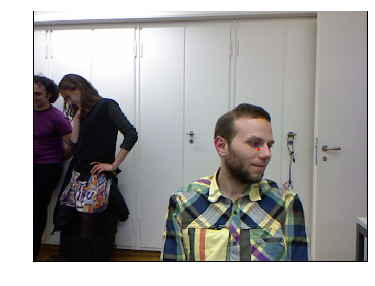

In [54]:
cntr = get_cntr(fname)
img.show(y=get_imgpts(img, cntr), figsize=(6,6))

## EDA

In [55]:
data = (PointsItemList.from_folder(biwi_path)
        .split_by_valid_func(lambda f: f.parent.name=='15')
        .label_from_func(get_cntr)
        .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch().normalize(imagenet_stats))

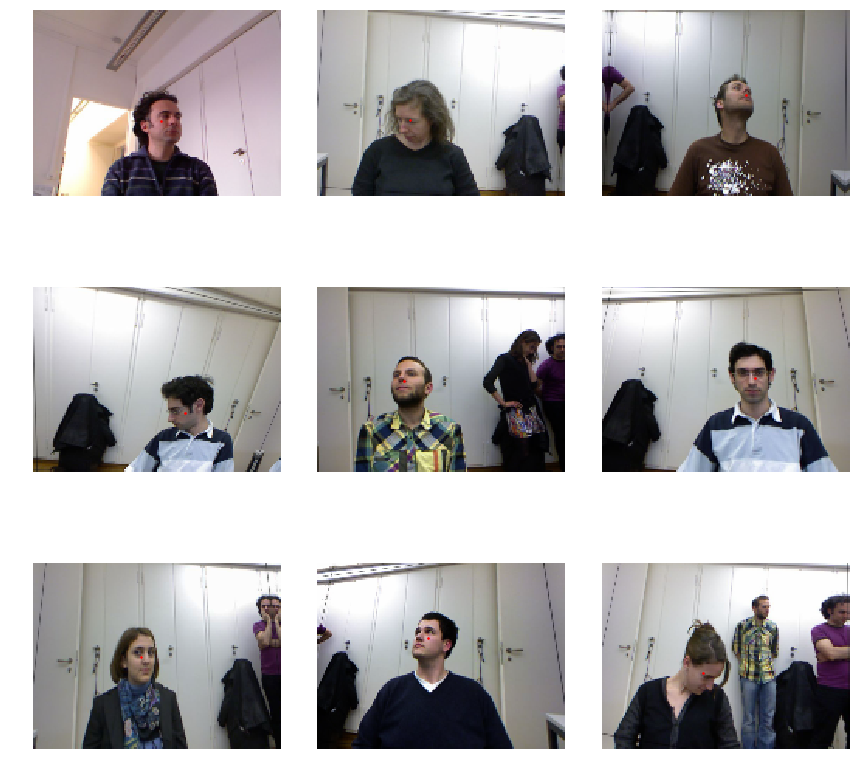

In [56]:
data.show_batch(rows=3)

## Training

**1. Finetune Resnet50**

In [77]:
accuracy??

Signature: accuracy(input: torch.Tensor, targs: torch.Tensor) -> <function NewType.<locals>.new_type at 0x7fe3d0597f28>
Source:   
def accuracy(input:Tensor, targs:Tensor)->Rank0Tensor:
    "Compute accuracy with `targs` when `input` is bs * n_classes."
    n = targs.shape[0]
    input = input.argmax(dim=-1).view(n,-1)
    targs = targs.view(n,-1)
    return (input==targs).float().mean()
File:      /opt/anaconda3/lib/python3.7/site-packages/fastai/metrics.py
Type:      function


In [90]:
def cust_accuracy(input:Tensor, targs:Tensor)->Rank0Tensor:
    "Compute accuracy with `targs` when `input` is bs * n_classes."
    n = targs.shape[0]
    input = input.argmax(dim=-1).view(n,-1)
    targs = targs.view(-1).long()
    return (input==targs).float().mean()

In [91]:
learner = create_cnn(data=data, arch=models.resnet50, metrics=[cust_accuracy])

In [92]:
lr_find(learner)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


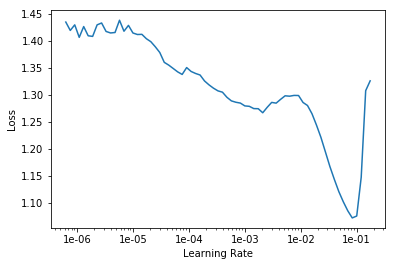

In [94]:
learner.recorder.plot()

In [95]:
lr = 2e-2

In [96]:
learner.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,cust_accuracy
1,0.052273,0.006595,0.972477
2,0.018130,0.023533,0.605505
3,0.007123,0.011783,1.000000
4,0.003975,0.006442,1.000000
5,0.002994,0.005237,1.000000


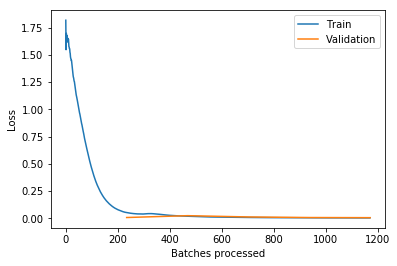

In [97]:
learner.recorder.plot_losses()

In [99]:
learner.save('rn50_trained')

## Results

In [102]:
learner.load('rn50_trained');

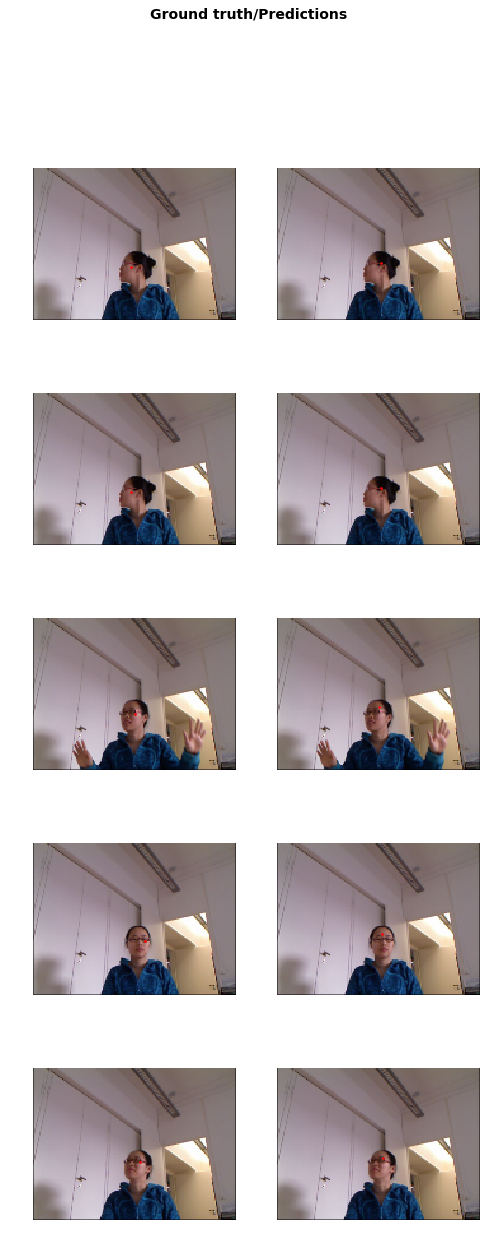

In [103]:
learner.show_results()

# 3. Image Segmentation

## Load Data: Camvid

In [3]:
cmv_path = untar_data(URLs.CAMVID)
cmv_path.ls()

[PosixPath('/home/jupyter/.fastai/data/camvid/codes.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images'),
 PosixPath('/home/jupyter/.fastai/data/camvid/valid.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels')]

In [4]:
cmv_path_img = cmv_path/'images'
cmv_path_lbl = cmv_path/'labels'

In [5]:
! cat {cmv_path}/codes.txt

Animal
Archway
Bicyclist
Bridge
Building
Car
CartLuggagePram
Child
Column_Pole
Fence
LaneMkgsDriv
LaneMkgsNonDriv
Misc_Text
MotorcycleScooter
OtherMoving
ParkingBlock
Pedestrian
Road
RoadShoulder
Sidewalk
SignSymbol
Sky
SUVPickupTruck
TrafficCone
TrafficLight
Train
Tree
Truck_Bus
Tunnel
VegetationMisc
Void
Wall


In [6]:
! head {cmv_path}/valid.txt

0016E5_07959.png
0016E5_07961.png
0016E5_07963.png
0016E5_07965.png
0016E5_07967.png
0016E5_07969.png
0016E5_07971.png
0016E5_07973.png
0016E5_07975.png
0016E5_07977.png


## EDA

**File Visualization**

In [7]:
fnames = get_image_files(cmv_path_img)
fnames[:3]

[PosixPath('/home/jupyter/.fastai/data/camvid/images/Seq05VD_f00240.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0016E5_06870.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/Seq05VD_f01380.png')]

In [8]:
lbl_fnames = get_image_files(cmv_path_lbl)
lbl_fnames[:3]

[PosixPath('/home/jupyter/.fastai/data/camvid/labels/Seq05VD_f04560_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_01920_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_05640_P.png')]

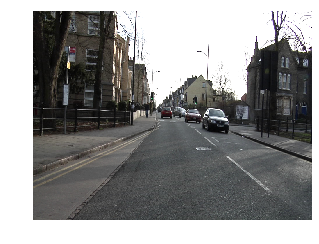

In [9]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [10]:
def get_y(img_f): return cmv_path_lbl/f'{img_f.stem}_P{img_f.suffix}'

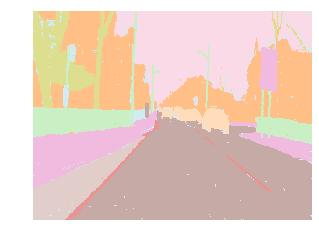

In [11]:
mask_f = get_y(img_f)
mask = open_mask(mask_f)
mask.show(figsize=(5,5))

In [12]:
np.array(img.size), mask.size

(array([720, 960]), torch.Size([720, 960]))

In [13]:
mask.data

tensor([[[26, 26, 26,  ..., 21, 21, 21],
         [26, 26, 26,  ..., 21, 21, 21],
         [26, 26, 26,  ..., 21, 21, 21],
         ...,
         [18, 18, 18,  ..., 17, 17, 17],
         [18, 18, 18,  ..., 17, 17, 17],
         [18, 18, 18,  ..., 17, 17, 17]]])

In [14]:
codes = np.loadtxt(cmv_path/'codes.txt', dtype='str')

In [15]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

**Create Databunch**

In [16]:
src_size = np.array(img.size)
size = src_size//2
bs=4

In [17]:
data = (SegmentationItemList.from_folder(cmv_path_img)
        .split_by_fname_file(cmv_path/'valid.txt')
        .label_from_func(get_y, classes=codes)
        .transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs).normalize(imagenet_stats))

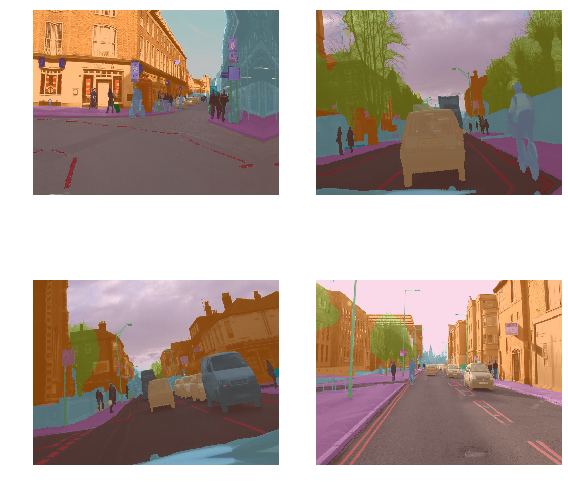

In [18]:
data.show_batch(rows=3)

## Training

In [19]:
name2code = {k:v for v,k in enumerate(codes)}
void_code = name2code['Void']

In [28]:
def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target!=void_code
    return (input.argmax(1)[mask]==target[mask]).float().mean()

In [29]:
learner = unet_learner(data=data, arch=models.resnet34, metrics=[acc_camvid])

In [22]:
lr_find(learner)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


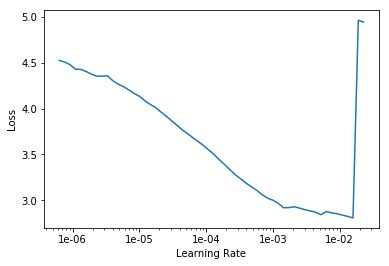

In [23]:
learner.recorder.plot()

In [24]:
lr = 1e-5

In [30]:
learner.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,acc_camvid
1,2.944646,1.933086,0.570103
2,1.321314,1.076099,0.769398
3,1.003885,0.864655,0.806995
4,0.933701,0.843282,0.808053


In [32]:
learner.save('rn50_finetuned')

## Results

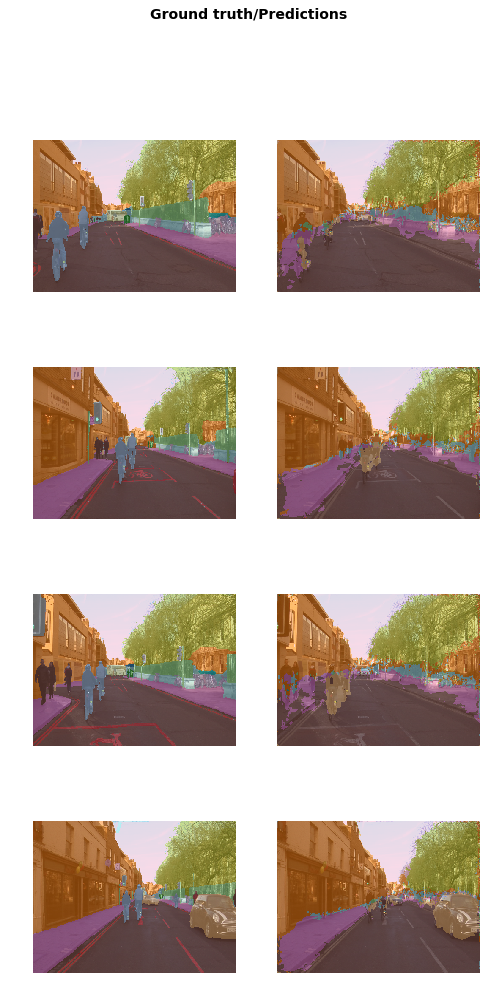

In [31]:
learner.show_results()